# Exercise 4: DFT and IDFT

In [1]:
import numpy as np
from numpy.fft import fft
import scipy.signal as sig

import matplotlib.pyplot as plt
%matplotlib inline 

[Numpy for MATLAB users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html)

## 4.4 Task:
Complete the function `re_fft` for calculating the DFT of a real-valued data sequence of length $2M$ by a complex DFT of length $M$. Run the test routine afterwards to compare the result of this function with the DFT of length $2M$.

In [2]:
def re_fft(x):
    if x.shape[0] % 2 != 0:
        raise ValueError("An even number of samples is necessary!")
    if np.iscomplexobj(x):
        raise ValueError("The input signal needs to be real-valued!")
        
    M = x.shape[0]//2
        
    # Convert real-valued input signal array x
    # into complex-valued signal aray y with half the size
    # EITHER: Perform splitting OR: USE numpy view
    y =  # TODO
    
    # fft of complex input signal
    Y =  # TODO
    
    # Calculate Y_1 and Y_2
    # Note: Y[M] does not exist!
    # Idea: (Y[1] + Y*[M-1])/2 needs to be calculated, but simple
    # reversing results in (Y[1] + Y*[M-2])/2 => append Y[M] = Y[0] to Y
    Y =  # TODO
    Y_1 =  # TODO
    Y_2 =  # TODO
    
    # Complete first half of X
    X = # TODO
    
    # for second half: X[M] is already set right
    # through prev. appending operation
    
    # Now X[M+1] = X[N/2 + 1] = X[N - (N/2-1)] = X*[N/2-1] = X*[M - 1]
    # and so on until X[N-1] = X*[1]
    # thus: [X[M-1], ..., X[1]].conj() = X[M-1:0:-1].conj()
    # to be appended, because index set is interval [Begin, End)
    # M-1 is in it, but 0 is excluded
    X =  # TODO
    
    return X

### Test Case 1:

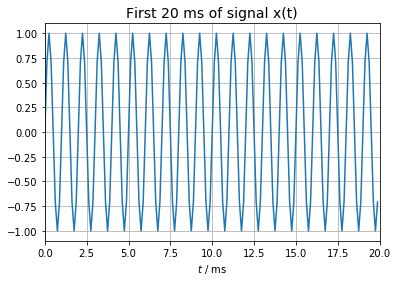

In [3]:
# create sine as a test signal
N  = 2**10;
f = 1000;
fs= 8000;
Ts = 1/fs;

t = np.r_[0:N*Ts:Ts]
x = np.sin((2*np.pi*f)*t)

plt.plot(t[t < 0.02]*1000, x[t < 0.02]);
plt.xlim((0, 20))
plt.grid(True)
plt.xlabel(r'$t\ /\ \mathrm{ms}$')
plt.title("First 20 ms of signal x(t)",
          fontsize=14);

Relative quadratic error: 6.983021e-33


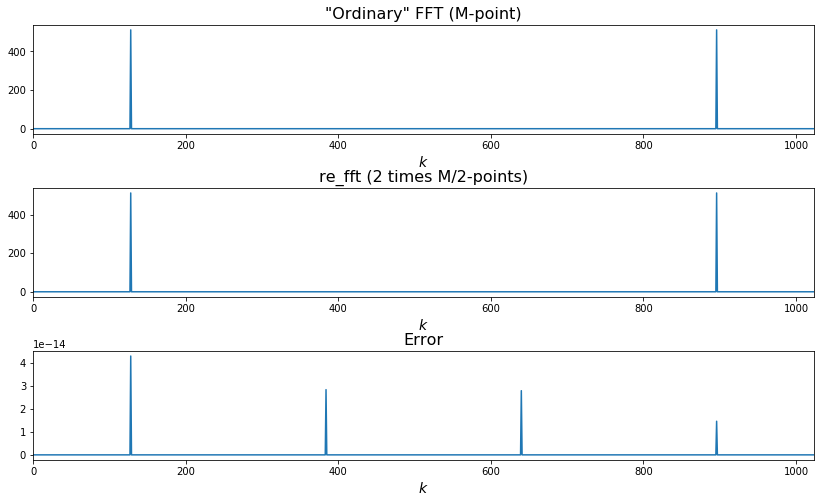

In [4]:
# calculate reference fft and own implementation
X_ref = fft(x)
X_test = re_fft(x)

# plot the results
plt.figure()
plt.subplot(3, 1, 1)
plt.plot(abs(X_ref))
plt.title('"Ordinary" FFT (M-point)', fontsize=16)

plt.subplot(3, 1, 2)
plt.plot(abs(X_test))
plt.title('re_fft (2 times M/2-points)', fontsize=16)

plt.subplot(3, 1, 3)
plt.plot(abs(X_test-X_ref))
plt.title('Error', fontsize=16)

plt.gcf().subplots_adjust(hspace=0.5)
plt.gcf().set_size_inches(14, 8)
[ax.set_xlim((0, 1024)) and ax.set_xlabel(r'$k$', fontsize=14)
 for ax in plt.gcf().get_axes()]

# Calculate the error
error_rel_fft = np.linalg.norm(X_test - X_ref)**2/np.linalg.norm(X_ref)**2
print("Relative quadratic error: {:e}".format(error_rel_fft))

## 4.5 Task:
Implement the function `alt_ifft`, which implements the IFFT using the FFT. Did you remember the advantage of this approach?

In [ ]:
def alt_ifft(X):
    x =  # TODO
    return x

### Test Case 2:
This test compares your implementation of the IFFT with the former time domain signal

In [ ]:
x_alt = alt_ifft(fft(x))

error_rel_ifft = np.linalg.norm(x_alt - x)**2/np.linalg.norm(x)**2
print("Relative quadratic error: {:e}".format(error_rel_ifft))